In [68]:
from astropy.table import Table
from matplotlib import pyplot as plt
import os

In [21]:
objs = Table.read('data/first_08jul16.fits')
objs.colnames

['RA',
 'DEC',
 'SIDEPROB',
 'FPEAK',
 'FINT',
 'RMS',
 'MAJOR',
 'MINOR',
 'POSANG',
 'FITTED_MAJOR',
 'FITTED_MINOR',
 'FITTED_POSANG',
 'FLDNAME',
 'NSDSS',
 'SDSS_SEP',
 'SDSS_MAG',
 'SDSS_CLASS',
 'NGSC2',
 'GSC2_SEP',
 'GSC2_MAG',
 'GSC2_CLASS',
 'NTMASS',
 'TMASS_SEP',
 'TMASS_MAG']

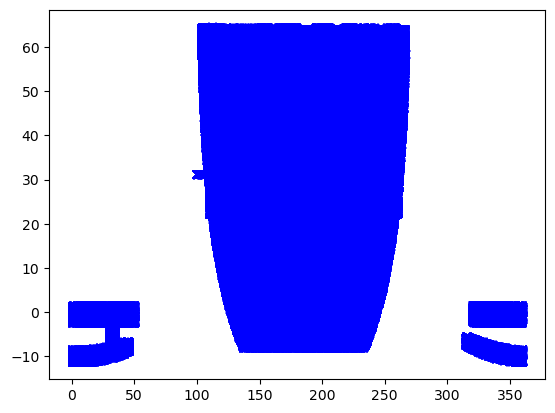

In [22]:
plt.plot(objs['RA'], objs['DEC'], 'bx')
plt.show()

In [23]:
ra, dec = objs['RA'][:100], objs['DEC'][:100]

In [29]:
for i in range(len(ra)):
    os.system(f"python sdssDR9query.py {ra[i]} {dec[i]}>> result.txt")

In [32]:
data = []
with open('result.txt') as f:
    for line in f.readlines():
        if 'No' in line:
            continue
        data.append(line.strip().split(','))

In [66]:
def get_sweep_files(data):
    sweep_files = []
    
    for element in data:
        ra, dec = float(element[0]), float(element[1])
        ra_1, ra_2 = str(int(ra//10*10)).rjust(3, '0'), str(int(ra//10*10+10)).rjust(3, '0')
        dec_1, dec_2 = str(int(dec//5*5)).rjust(3, '0'), str(int(dec//5*5+5)).rjust(3, '0')
        sweep_files.append(f'sweep-{ra_1}p{dec_1}-{ra_2}p{dec_2}.fits')
        
    return set(sweep_files)

In [67]:
get_sweep_files(data)

{'sweep-100p060-110p065.fits',
 'sweep-150p060-160p065.fits',
 'sweep-160p060-170p065.fits',
 'sweep-190p060-200p065.fits',
 'sweep-210p060-220p065.fits'}